# **Business understanding**

We all know cars depreciate. Some of us might have heard about myths, through word of mouth, saying some types of cars depreciate less than others i.e. SUVs vs saloons or big engine vs small engine.

I also know of these myths. But how true are they? I have 4 questions I want to answer:
## **Question 1: Do SUVs depreciate less than saloon/estates?**
## **Question 2: Does doing less milage reduce depreciation?**
## **Question 3: Does having a car with a bigger engine reduce depreciation?**
## **Question 4: Do some brands depreciate less than others?**

To answer these questions I have scraped car adds for BMW sales (~11,000) and Jaguar sales (~4,500) from 2015 to brand new, as of 10/06/2021.

In [249]:
import pandas as pd
import numpy as np
import Database as db
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# **Data understanding**

### **Gather**

In [250]:
connection_BMW = db.create_server_connection("localhost", "root", "your password here", "CarData_BMW")
df_BMW = pd.read_sql('SELECT * FROM BMW', con = connection_BMW)

connection_Jaguar = db.create_server_connection("localhost", "root", "your password here", "CarData_Jaguar")
df_Jaguar = pd.read_sql('SELECT * FROM Jaguar', con = connection_Jaguar)

print('Below is the head of the BMW dataframe')
display(df_BMW.head())
print('Below is the head of the Jaguar dataframe')
display(df_Jaguar.head())

Connection to database CarData_BMW established.
Connection to database CarData_Jaguar established.
Below is the head of the BMW dataframe


,id,price,model,year,body,milage,engine_size,engine_power,transmission,fuel_type,owners,ultra_low_emissions_zone,service_history,first_year_road_tax,full_manufacturer_warranty,unexpected_value
0,1,9995,5 Series,2015,saloon,126000,2.0,190,automatic,diesel,1,1,full dealership history,0,0,ok
1,2,14450,5 Series,2016,saloon,52761,2.0,190,automatic,diesel,100,1,unlisted,0,0,ok
2,3,11880,5 Series,2015,saloon,75000,2.0,190,automatic,diesel,100,1,unlisted,0,0,ok
3,4,10950,5 Series,2015,saloon,81000,2.0,190,automatic,diesel,3,1,unlisted,0,0,ok
4,5,13495,5 Series,2015,saloon,54758,2.0,190,automatic,diesel,2,1,full dealership history,0,0,ok


Below is the head of the Jaguar dataframe


,id,price,model,year,body,milage,engine_size,engine_power,transmission,fuel_type,owners,ultra_low_emissions_zone,service_history,first_year_road_tax,full_manufacturer_warranty,unexpected_value
0,1,59995,C-Type,2017,convertible,1000,4.2,1000000,manual,petrol,100,0,full service history,0,0,ok
1,2,25000,XK,2015,coupe,78000,5.0,503,automatic,petrol,3,1,unlisted,0,0,ok
2,3,67500,XK,2015,convertible,7000,5.0,503,automatic,petrol,100,1,unlisted,0,0,ok
3,4,43990,XK,2015,convertible,13269,5.0,385,automatic,petrol,2,1,unlisted,0,0,ok
4,5,29000,XJS,2017,convertible,37500,5.3,1000000,automatic,petrol,1,0,part service history,0,0,ok


### **Assess**

Let's have a look at the columns of data that we are going to use for the analysis below. First for our BMW database.

In [251]:
display(df_BMW.dtypes)
display(df_BMW['price'].describe())
display(df_BMW['milage'].describe())
display(df_BMW['year'].describe())
print('We have ', df_BMW['price'].isnull().sum(),' empty values for price, ',\
      df_BMW['milage'].isnull().sum(),' empty values for mileage and ',\
      df_BMW['year'].isnull().sum(),' empty values for year')

id                              int64
price                           int64
model                          object
year                            int64
body                           object
milage                          int64
engine_size                   float64
engine_power                    int64
transmission                   object
fuel_type                      object
owners                          int64
ultra_low_emissions_zone        int64
service_history                object
first_year_road_tax             int64
full_manufacturer_warranty      int64
unexpected_value               object
dtype: object

count     24132.000000
mean      26849.509282
std       15468.855134
min        2900.000000
25%       16490.000000
50%       22975.000000
75%       32452.500000
max      511380.000000
Name: price, dtype: float64

count      24132.000000
mean      118135.636416
std       277325.854510
min            1.000000
25%        14469.750000
50%        29705.500000
75%        51391.000000
max      1000000.000000
Name: milage, dtype: float64

count    24132.000000
mean      1837.872907
std        574.646538
min          0.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2021.000000
Name: year, dtype: float64

We have  0  empty values for price,  0  empty values for mileage and  0  empty values for year


Then for our Jaguar database also.

In [252]:
display(df_Jaguar.dtypes)
display(df_Jaguar['price'].describe())
display(df_Jaguar['milage'].describe())
display(df_Jaguar['year'].describe())
print('We have ', df_Jaguar['price'].isnull().sum(),' empty values for price, ',\
      df_Jaguar['milage'].isnull().sum(),' empty values for mileage and ',\
      df_Jaguar['year'].isnull().sum(),' empty values for year')

id                              int64
price                           int64
model                          object
year                            int64
body                           object
milage                          int64
engine_size                   float64
engine_power                    int64
transmission                   object
fuel_type                      object
owners                          int64
ultra_low_emissions_zone        int64
service_history                object
first_year_road_tax             int64
full_manufacturer_warranty      int64
unexpected_value               object
dtype: object

count      5026.000000
mean      38246.050935
std       19609.738532
min        5995.000000
25%       23684.000000
50%       33495.000000
75%       51950.000000
max      259950.000000
Name: price, dtype: float64

count       5026.000000
mean      282486.987664
std       428871.394919
min            5.000000
25%        12395.500000
50%        31955.000000
75%      1000000.000000
max      1000000.000000
Name: milage, dtype: float64

count    5026.000000
mean     1490.743534
std       886.577318
min         0.000000
25%         0.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: year, dtype: float64

We have  0  empty values for price,  0  empty values for mileage and  0  empty values for year


# **Data preparation**

### **Clean**

I am quite intimate with these datasets as I designed the structure into which the web scraper dumped the collected data. I have a few things I know I want to do to them to better answer the questions I have.

Mod 1: First I want to limit the data at which I am looking to a few models. I have tried looking at it more widely but you can easily get overloaded with information. Also I don't want to look at cars which have a high prestige element to their pricing. The lists of allowed models I have chosen is fully subjective.

Mod 2: I want to limit the data to saloons, estates and SUVs only as this will make it more digestible and I won't lose my blog readers amond all the details.

Mod 3: I did not identify new cars. I can fix that easily because it is impossible to advertise a car without having the manufacturing year stated. First step of putting a car up for sale is inputting the registration number. The manufacturing year gets pulled from a database for that registration number. **Due to having to work wihin the constraints of the existing data structure brand new cars will have manufacturing year 2022**.

Mod 4: I used some significant numbers instead of NaNs to mark out missing data. Bad idea. So converting the to NaNs as they are easier to work with rather than random numbers.

Mod 5: I am also eliminating engines bigger than 4.4. L for the BMW dataset because there are not enough cars (17) to extract any meaningfull trend.

In [253]:
# Mod 1
accepted_model_list_BMW = ['5 Series', '4 Series Gran Coupe', '4 Series',
       '3 Series', '1 Series',
       'X6', 'X5', 'X4', 'X3', 'X1',
       '7 Series', '2 Series Gran Tourer',
       '2 Series Active Tourer', '2 Series']
df_BMW = df_BMW.loc[df_BMW['model'].isin(accepted_model_list_BMW)]

accepted_model_list_Jaguar = ['XJ', 'XF', 'XE', 'I-Pace', 'F-PACE', 'E-PACE']
df_Jaguar = df_Jaguar.loc[df_Jaguar['model'].isin(accepted_model_list_Jaguar)]

# Mod 2
df_BMW = df_BMW.loc[df_BMW['body'].isin(['saloon', 'estate', 'suv'])]
df_Jaguar = df_Jaguar.loc[df_Jaguar['body'].isin(['saloon', 'estate', 'suv'])]

# Mod 3
for df in [df_BMW, df_Jaguar]:
    for idx, row in df.iterrows():
        if df.loc[idx,'year'] == 0:
            df.loc[idx,'milage'] = 0
            df.loc[idx,'year'] = 2022
            df.loc[idx,'owners'] = 0

# Mod 4
for df in [df_BMW, df_Jaguar]:
    for idx, row in df.iterrows():
        if df.loc[idx,'milage'] == 1000000:
            df.loc[idx,'milage'] = np.nan
        if df.loc[idx,'body'] == 'unlisted':
            df.loc[idx,'body'] = np.nan
        if df.loc[idx,'engine_size'] == 50:
            df.loc[idx,'engine_size'] = np.nan
        if df.loc[idx,'engine_power'] == 1000000:
            df.loc[idx,'engine_power'] = np.nan
        if df.loc[idx,'transmission'] == 'unlisted':
            df.loc[idx,'transmission'] = np.nan
        if df.loc[idx,'fuel_type'] == 'unlisted':
            df.loc[idx,'fuel_type'] = np.nan
        if df.loc[idx,'owners'] == 100:
            df.loc[idx,'owners'] = np.nan

# Mod 5
print('The number of cars with engines bigger than 4.4 L is ',df_BMW.loc[df_BMW['engine_size'] > 6].shape[0])
df_BMW = df_BMW.loc[(df_BMW['engine_size'] < 6) | (pd.isna(df_BMW['engine_size']))]


The number of cars with engines bigger than 4.4 L is  17


Now let's correct some things I found wrong with the data whilst working on this project. First with the BMW dataset.

1. One person added an extra 0 to the price of their X3
2. One guy added too many 9s to the price of their 5 Series
3. Another guy added too many zeros to the price of his 5 Series
4. One guy advertised an alpina B5 as a normal 5 series. I am interested only in cars that are valued for their utility mostly, not for their luxury.
5. There are two chaps who are claiming that in 3.5 years they have done 512,231 and 710,344 miles. This is highly unlikely as that would mean they would have to spend every working day in the year, at 70 MPH for 8 hours and 11 hours respectively. This is highly improbable so I will delete this data. There are only two data points so the effect on my dataset is inconsequential.

In [254]:
# 1
print('Below is the X3 that I believe has too many 0s in the price')
display(df_BMW.loc[df_BMW['price'] == df_BMW['price'].max()])
print('\n')
wrong_price_index = df_BMW.index[df_BMW['price'] == df_BMW['price'].max()][0]
df_BMW.loc[wrong_price_index,'price'] = int(df_BMW['price'].max()/10)
# 2
wrong_price_index = df_BMW.index[(df_BMW['body'] == 'saloon') & (df_BMW['price'] == 134999)][0]
print('Below is the 5 series where I make an educated guess that there are too many 9s in the price')
display(df_BMW.loc[wrong_price_index])
print('\n')
df_BMW.loc[wrong_price_index,'price'] = 13499
# 3
wrong_price_index = df_BMW.index[(df_BMW['body'] == 'saloon') & (df_BMW['price'] == 117400)][0]
print('Below is the 5 series where I make an educated guess that there are too many 0s in the price')
display(df_BMW.loc[wrong_price_index])
print('\n')
df_BMW.loc[wrong_price_index,'price'] = 11740
# 4
wrong_price_index = df_BMW.index[(df_BMW['body'] == 'estate') & (df_BMW['price'] ==  103720)][0]
df_BMW = df_BMW.drop(wrong_price_index)
# 5
print('Below are the chaps that said they have done more miles than they possibly could have')
display(df_BMW.loc[df_BMW['milage'] > 300000])
df_BMW = df_BMW.loc[df_BMW['milage'] < 300000]

Below is the X3 that I believe has too many 0s in the price


,id,price,model,year,body,milage,engine_size,engine_power,transmission,fuel_type,owners,ultra_low_emissions_zone,service_history,first_year_road_tax,full_manufacturer_warranty,unexpected_value
11951,11952,511380,X3,2022,suv,0.0,NaN,NaN,automatic,petrol,0.0,0,unlisted,1,1,ok




Below is the 5 series where I make an educated guess that there are too many 9s in the price


id                                 7887
price                            134999
model                          5 Series
year                               2015
body                             saloon
milage                          79227.0
engine_size                         2.0
engine_power                      188.0
transmission                  automatic
fuel_type                        diesel
owners                              NaN
ultra_low_emissions_zone              1
service_history                unlisted
first_year_road_tax                   0
full_manufacturer_warranty            0
unexpected_value                     ok
Name: 7886, dtype: object



Below is the 5 series where I make an educated guess that there are too many 0s in the price


id                                 7878
price                            117400
model                          5 Series
year                               2016
body                             saloon
milage                          90000.0
engine_size                         2.0
engine_power                      190.0
transmission                  automatic
fuel_type                        diesel
owners                              2.0
ultra_low_emissions_zone              1
service_history                unlisted
first_year_road_tax                   0
full_manufacturer_warranty            0
unexpected_value                     ok
Name: 7877, dtype: object



Below are the chaps that said they have done more miles than they possibly could have


,id,price,model,year,body,milage,engine_size,engine_power,transmission,fuel_type,owners,ultra_low_emissions_zone,service_history,first_year_road_tax,full_manufacturer_warranty,unexpected_value
2650,2651,17495,3 Series,2017,saloon,512231.0,2.0,252.0,automatic,petrol plug-in hybrid,NaN,1,unlisted,0,0,ok
4048,4049,13940,3 Series,2017,estate,710344.0,1.5,136.0,automatic,petrol,NaN,1,full service history,0,0,ok


Now for the Jaguar dataset.

1. Removing the project 8 cars from saloons. (these were identified by the large 5 L engine)
2. One guy thought his E-Pace is an estate.
3. There is one chat in this dataset as well that says has done an improbable number of miles, 725955. Going to delete this data point.
4. One chat is selling a 1 year old F-type for £129,000 when a brand new top of the range one is £109,000. Going to delete this data point too.

In [255]:
# 1
indexes = df.loc[(df_Jaguar['model'] == 'XE') & (df_Jaguar['engine_size'] == 5.0)].index
df_Jaguar = df_Jaguar.drop(indexes)
# 2
wrong_body_index = df_Jaguar.index[(df_Jaguar['body'] == 'estate') & (df_Jaguar['model'] ==  'E-PACE')][0]
df_Jaguar = df_Jaguar.drop(wrong_body_index)
# 3 & 4
df_Jaguar = df_Jaguar.loc[(df_Jaguar['price'] < 100000) & (df_Jaguar['milage'] < 300000)]

Let's have look what our data preparation has done for us. First up, the BMW dataset.

In [256]:
print('Overall stat for the BMW dataset')
display(df_BMW['price'].describe())
display(df_BMW['milage'].describe())
display(df_BMW['year'].describe())

Overall stat for the BMW dataset


count     11404.000000
mean      27837.491407
std       12813.117734
min        2900.000000
25%       18500.000000
50%       24994.500000
75%       34000.000000
max      136500.000000
Name: price, dtype: float64

count     11404.000000
mean      30614.239740
std       26187.052856
min           0.000000
25%        9532.750000
50%       25727.000000
75%       44530.000000
max      190000.000000
Name: milage, dtype: float64

count    11404.000000
mean      2017.974220
std          1.967071
min       2015.000000
25%       2017.000000
50%       2018.000000
75%       2019.000000
max       2022.000000
Name: year, dtype: float64

Followed by the Jaguar dataset.

In [257]:
print('Overall stat for the Jaguar dataset')
display(df_Jaguar['price'].describe())
display(df_Jaguar['milage'].describe())
display(df_Jaguar['year'].describe())

Overall stat for the Jaguar dataset


count     4495.000000
mean     36026.066073
std      18476.645793
min       5995.000000
25%      21499.500000
50%      31899.000000
75%      45900.000000
max      94680.000000
Name: price, dtype: float64

count      4495.000000
mean      20970.447386
std       24461.169903
min           0.000000
25%           0.000000
50%       13293.000000
75%       32299.000000
max      151638.000000
Name: milage, dtype: float64

count    4495.000000
mean     2018.925695
std         2.307530
min      2015.000000
25%      2017.000000
50%      2019.000000
75%      2022.000000
max      2022.000000
Name: year, dtype: float64

# **Evaluation**

With all the anomalies from the data now gone we can move on to using the data and answering our questions.

## **Question 1: Do SUVs depreciate less than saloon/estates?**

### **Analyse**

Let's synthetize the data to make it ready for ploting and visualization. First, I want to have a look at year over year depreciation for all body types.

In [258]:
list_of_years = np.sort(df_BMW['year'].unique())
list_of_bodies = np.delete(df_BMW['body'].unique(),np.where(df_BMW['body'].unique()=='unlisted'))

age_depreciation_individual_year = pd.DataFrame(columns = ['Body','Year','Age depreciation'])

counter = 0
for body in list_of_bodies:
    for year in list_of_years:
        if year != 2022:
            future_year_mean = df_BMW.loc[(df_BMW['year'] == list_of_years[np.where(list_of_years == year)[0][0] + 1]) & (df_BMW['body'] == body)]['price'].mean()
            current_year_mean = df_BMW.loc[(df_BMW['year'] == year) & (df_BMW['body'] == body)]['price'].mean()
            difference = (future_year_mean - current_year_mean) / future_year_mean * 100
            if pd.notna(difference):
                age_depreciation_individual_year.loc[counter, 'Body'] = body
                age_depreciation_individual_year.loc[counter, 'Year'] = year
                age_depreciation_individual_year.loc[counter, 'Age depreciation'] = difference
                counter += 1
        else:
            next

### **Visualise**

Now let's plot it out and trend hunt.

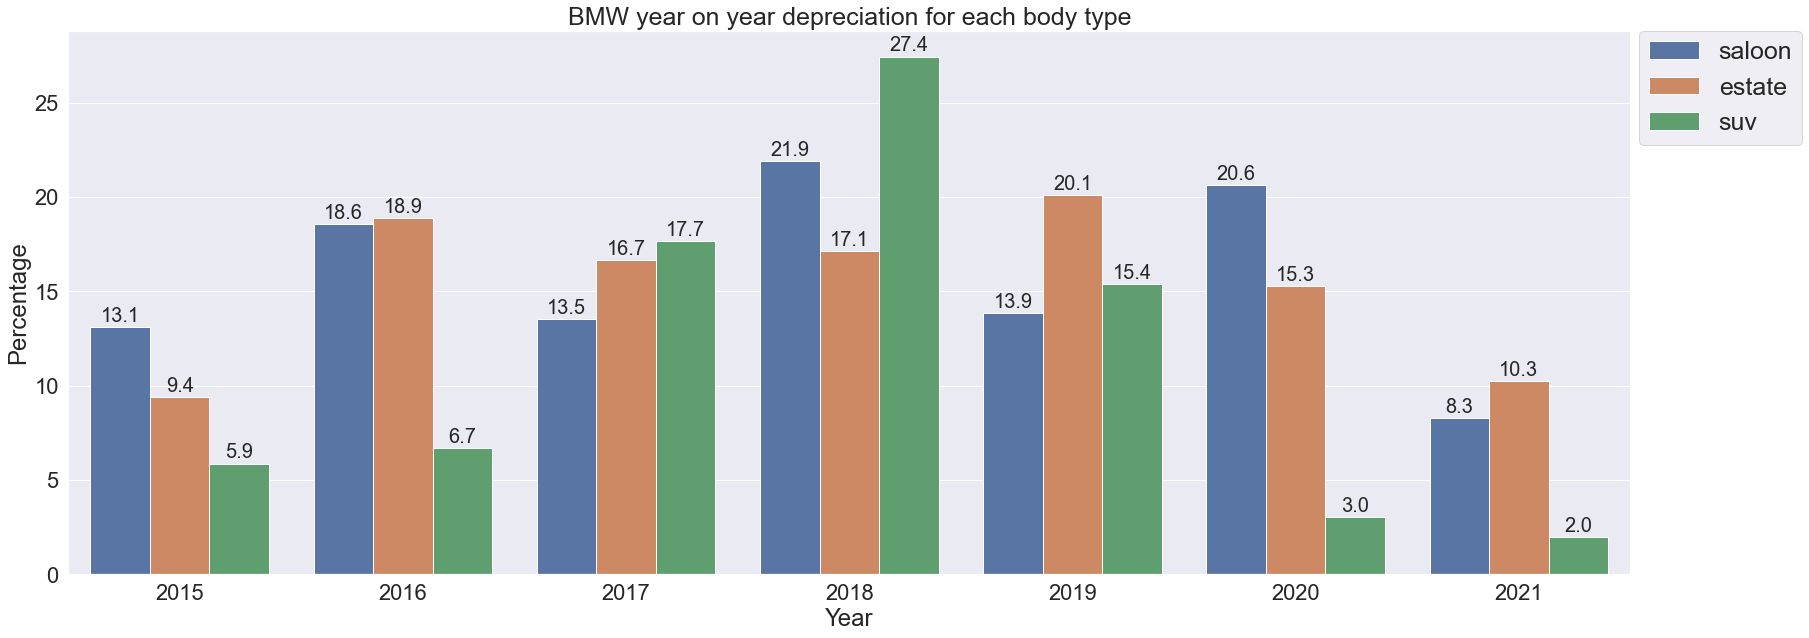

In [259]:
# Going to make a plotting function below as it is going to be used a lot in the notebook

def plotting_function(x_value, y_value, dataframe, title, hue_value = None, angled_labels = 0):
    '''
    Writing this function so that I can reuse the code lower down
    INPUT:
    x_value - Label of column who's values are going to be used for for the x axis
    y_value - Label of column who's values are going to be used for for the y axis
    hue_value - Label of column who's values are going to be used for grouping up bars for each value on the x axis.
    dataframe - Dataframe containing the columns used for the first 3 arguments
    title - Title that you want the plot to have
    angled_labels - 0 if you want normal, horizontal labels or 1 if you want vertical labels(to save space)
    OUTPUT:
    Displays a barplot formatted to ensure all the data is easily readatable.
    The barplot groups up bars for all values in argument 'hue_value' along the x axis, for every value in x_value
    '''
    sns.set(font_scale = 2)
    ax = sns.barplot(x = x_value, y = y_value, hue = hue_value, data = dataframe)
    sns.set(rc={'figure.figsize':(28,10)})
    ax.set(ylabel = 'Percentage')
    ax.set_title(title, fontsize = 25)

    for p in ax.patches:
        height = p.get_height()
        if pd.notna(height):
            ax.text(x = p.get_x()+(p.get_width()/2), y = height + 0.3, s = '{:.1f}'.format(height), ha = 'center', fontsize = 20)

    if angled_labels == 1:
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)

    plt.legend(bbox_to_anchor=(1.11, 1), borderaxespad=0, fontsize = 25);

plotting_function('Year', 'Age depreciation', age_depreciation_individual_year, 'BMW year on year depreciation for each body type', 'Body')

The only trend I can see is that depreciation generally picks up in the first 4 years after which it starts to drop off. This most likely is explained by the increase in supply of cars coming off of lease contracts but is not useful for our question.

### **Analyse**

Let's focus just on total depreciation from brand new in 2021 to 2015. And instead of years we will use models to see if different body types behave similar accross multiple models.

In [260]:
def total_depreciation(df):
    '''
    Writing this function so that I can reuse the code lower down
    INPUT:
    df - dataframe on which you want the operation performed on
    OUTPUT:
    Returns a dataframe containing the total depreciation value, from brand new (2021) to 2015, for each unique combination of the unique values found in the 'model' and 'body' columns of the inputted dataframe.
    '''
    list_of_bodies = np.delete(df['body'].unique(),np.where(df['body'].unique()=='unlisted'))
    list_of_models = df['model'].unique()

    age_depreciation_all_years = pd.DataFrame(columns = ['Model', 'Body', 'Age depreciation'])

    counter = 0

    for model in list_of_models:
        for body in list_of_bodies:
            original_value = df.loc[(df['model'] == model) & (df['year'] == 2022) & (df['body'] == body)]['price'].mean()
            depreciated_value = df.loc[(df['model'] == model) & (df['year'] == 2015) & (df['body'] == body)]['price'].mean()
            depreciation_percentage = (original_value - depreciated_value) / original_value * 100
            if pd.notna(depreciation_percentage):
                age_depreciation_all_years.loc[counter, 'Model'] = model
                age_depreciation_all_years.loc[counter, 'Body'] = body
                age_depreciation_all_years.loc[counter, 'Age depreciation'] = depreciation_percentage
                counter += 1
    return age_depreciation_all_years

age_depreciation_all_years = total_depreciation(df_BMW)

### **Visualise**

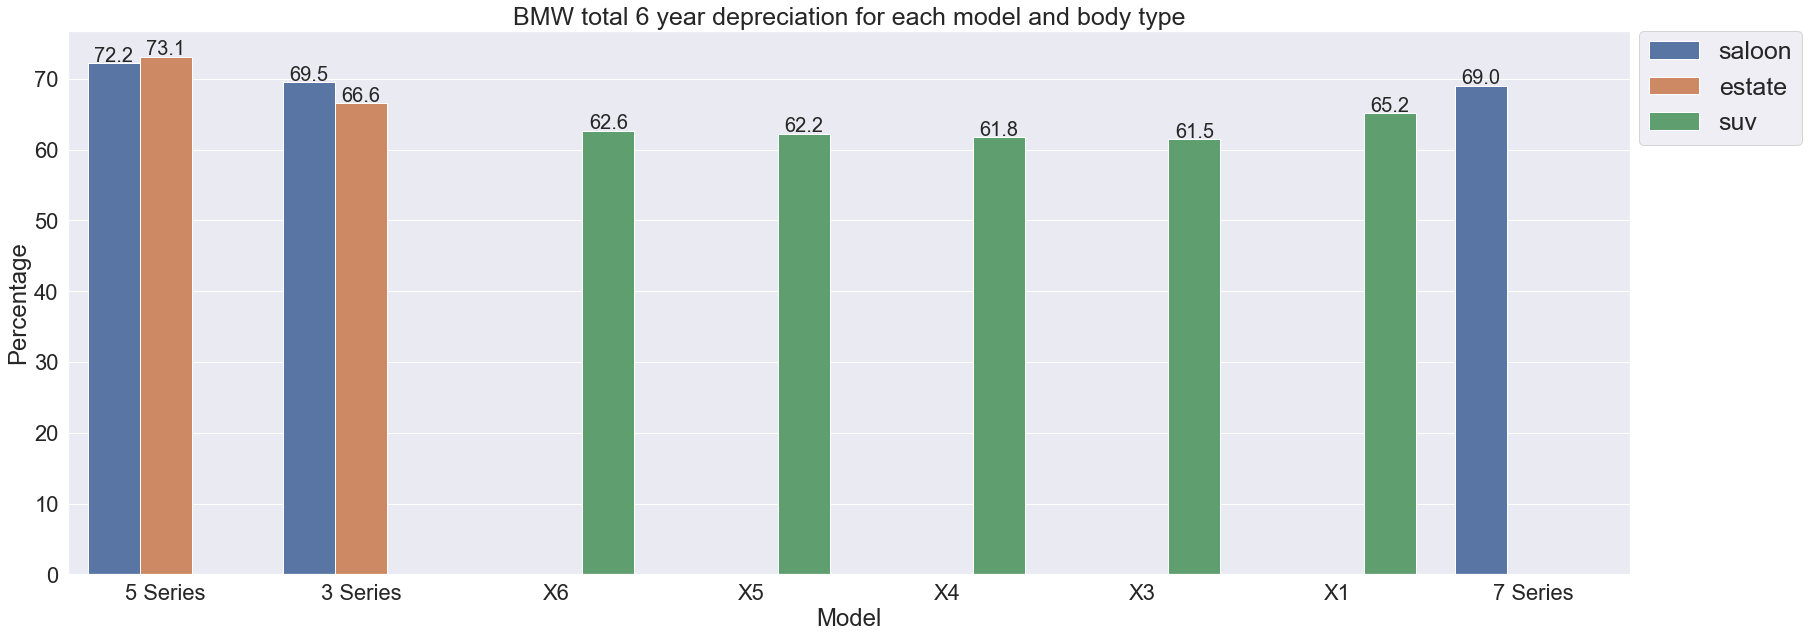

In [261]:
plotting_function('Model', 'Age depreciation', age_depreciation_all_years, 'BMW total 6 year depreciation for each model and body type', 'Body', 0)

A very nice result. Now we can see a trend and the performance of a body type is also very similar accross multiple model signifying marker preference.

If we average it out accross the different models we get the following depreciations:
1. SUVs by 62.42%.
2. Saloons by 70.23%.
3. Estates by 69.83%.

While sedans and saloons are similar to each other, SUV's depreciate slightly less. This concludes the 1st question and the answer seem to be yes but I would hesitate stating that as a generality. For other brands the trend might be different or not be at all.

## **Question 2: Does doing less milage reduce depreciation?**

### **Analyse**

To look into this we will follow the following steps:

1. The population was divided by the mean.
2. The average price was calculated for the higher mileage.
3. The average price was calculated for the lower mileage.
4. The percentage difference was calculated between the values from points 2 and 3.

In [262]:
list_of_years = np.sort(df_BMW['year'].unique())
list_of_bodies = np.delete(df_BMW['body'].unique(),np.where(df_BMW['body'].unique()=='unlisted'))

milage_depreciation_individual_year = pd.DataFrame(columns = ['Body','Year','Milage induced price difference'])

counter = 0

for body in list_of_bodies:
    for year in list_of_years:
        if year != 2022:
            filtered_df = df_BMW.loc[(df_BMW['body'] == body) & (df_BMW['year'] == year)]
            low_milage_mean = filtered_df.loc[filtered_df['milage'] < filtered_df['milage'].mean()]['price'].mean()
            high_milage_mean = filtered_df.loc[filtered_df['milage'] > filtered_df['milage'].mean()]['price'].mean()
            percentage_difference = (low_milage_mean - high_milage_mean) / low_milage_mean * 100
            if pd.notna(percentage_difference):
                milage_depreciation_individual_year.loc[counter, 'Body'] = body
                milage_depreciation_individual_year.loc[counter, 'Year'] = year
                milage_depreciation_individual_year.loc[counter, 'Milage induced price difference'] = percentage_difference
                counter += 1
        else:
            next

### **Visualise**

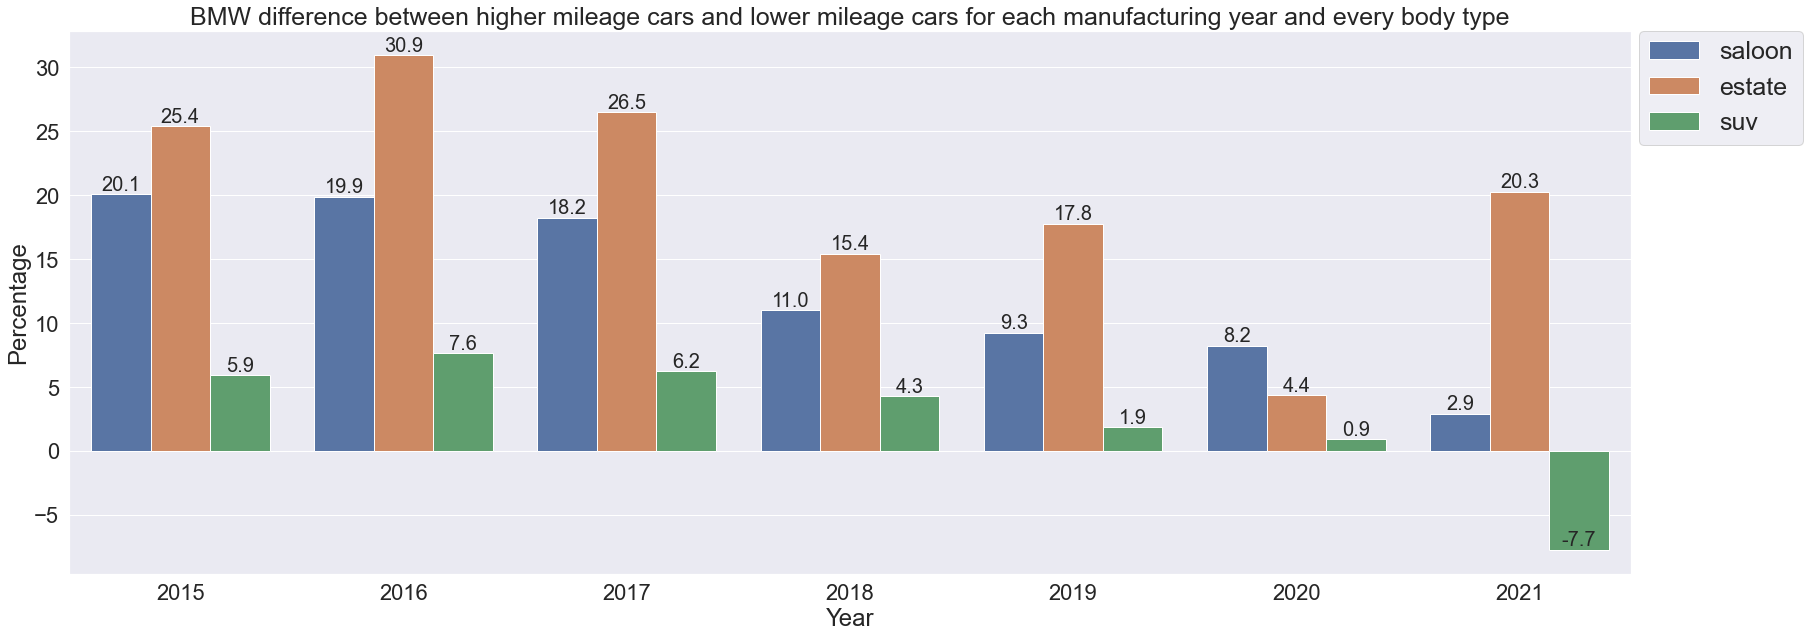

In [263]:
plotting_function('Year', 'Milage induced price difference', milage_depreciation_individual_year,\
                  'BMW difference between higher mileage cars and lower mileage cars for each manufacturing year and every body type', 'Body', 0)

Interestingly, this time, the trend is relatively consistent accross most of the years. The variation in the initial two years can be down to people not caring so much about milage due to the car being very new and still in warranty.

### **Analyse**

Still let's average it out accross all years and see if we can get a more succinct trend.

In [264]:
def mileage_sensitivity_all_years(df):
    '''
    Writing this function so that I can reuse the code lower down
    INPUT:
    df - dataframe on which you want the operation performed on
    OUTPUT:
    Returns a dataframe that has had the folloing steps performed on it:
    1) The population was divided by the mean.
    2) The average price was calculated for the higher mileage.
    3) The average price was calculated for the lower mileage.
    4) The percentage difference was calculated between the values from points 2 and 3.
    5) This above repeated for every year from 2021 to 2015 and the average of all the differences taken.
    '''
    list_of_years = np.sort(df['year'].unique())
    list_of_bodies = np.delete(df['body'].unique(),np.where(df['body'].unique()=='unlisted'))
    list_of_models = df['model'].unique()

    milage_depreciation_all_years = pd.DataFrame(columns = ['Model', 'Body','Milage induced price difference'])

    counter = 0

    for model in list_of_models:
        for body in list_of_bodies:
            acumulator = 0
            corrector = 0
            for year in list_of_years:
                filtered_df = df.loc[(df['model'] == model) & (df['body'] == body) & (df['year'] == year)]
                low_milage_mean = filtered_df.loc[filtered_df['milage'] < filtered_df['milage'].mean()]['price'].mean()
                high_milage_mean = filtered_df.loc[filtered_df['milage'] > filtered_df['milage'].mean()]['price'].mean()
                if pd.notna(low_milage_mean) and pd.notna(high_milage_mean):
                    percentage_difference = (low_milage_mean - high_milage_mean) / low_milage_mean * 100
                    acumulator += percentage_difference
                else:
                    corrector += 1
            if (len(list_of_years) - corrector) > 0:
                percentage_difference = acumulator / (len(list_of_years) - corrector)
                milage_depreciation_all_years.loc[counter, 'Model'] = model
                milage_depreciation_all_years.loc[counter, 'Body'] = body
                milage_depreciation_all_years.loc[counter, 'Milage induced price difference'] = percentage_difference
                counter += 1
            elif (len(list_of_years) - corrector) < 0:
                print('Acumulator: ', acumulator,', Corrector: ', corrector)
            else:
                pass
    return milage_depreciation_all_years

milage_depreciation_all_years = mileage_sensitivity_all_years(df_BMW)

### **Visualise**

Next lets apply the same plot that shows the trend accross models.

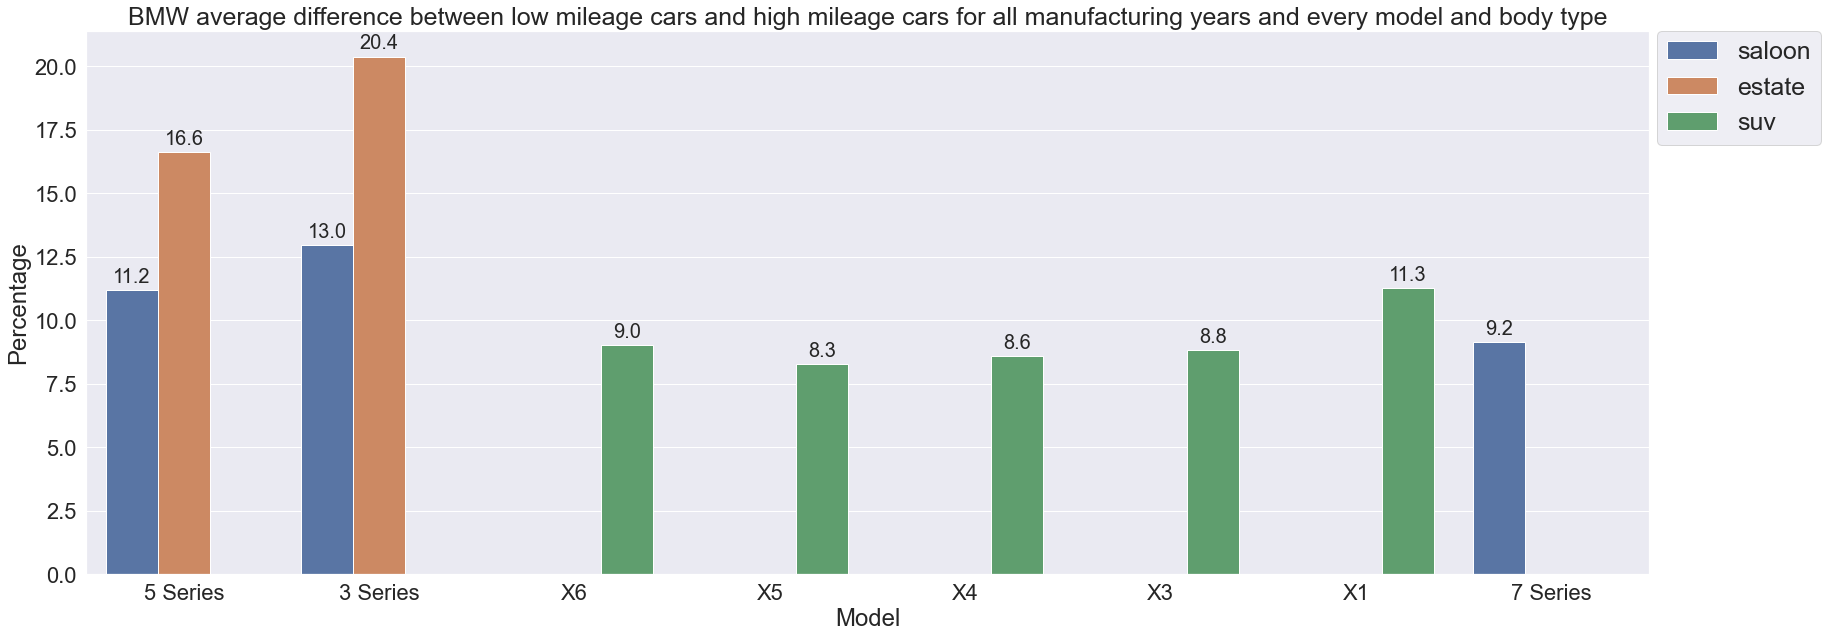

In [265]:
plotting_function('Model', 'Milage induced price difference', milage_depreciation_all_years,\
                  'BMW average difference between low mileage cars and high mileage cars for all manufacturing years and every model and body type', 'Body', 0)

Trend compresses nicely. If we average it out accross models we get the following depreciations:

1. SUVs, 9.18%.
2. Saloons, 11.06%.
3. Estates, 18.5%.

This time SUVs and sedans are closer together with the estates being the most mileage sensitive by quite a few percentages. If you compound this with higher than SUV depreciation due to age, you are looking at a potentially bad purchase by buying an estate. The answer to this questions seems to be yes as well but again, you wouldn't know which car has mileage sensitive pricing without doing this research.

## **Question 3: Does having a car with a bigger engine reduce depreciation?**

### **Analyse**

We are going to use the same methodology as before but skip the detailed part as averaging accross all year has provided more reliable results. This question is going to approached from both the angles from which **Question 1** and **Question 2** were approached, i.e. influence of engine size on depreciation and also mileage sensitivity. Lets begin with the former.

In [266]:
list_of_bodies = np.delete(df_BMW['body'].unique(),np.where(df_BMW['body'].unique()=='unlisted'))
list_of_engine_sizes = np.sort(np.delete(df_BMW['engine_size'].unique(), np.where(df_BMW['engine_size'].unique() == 50)))

age_depreciation_all_years_and_engines = pd.DataFrame(columns = ['Body', 'Engine size', 'Age depreciation'])

counter = 0

for body in list_of_bodies:
    for engine in list_of_engine_sizes:
        original_value = df_BMW.loc[(df_BMW['engine_size'] == engine) & (df_BMW['year'] == 2022) & (df_BMW['body'] == body)]['price'].mean()
        depreciated_value = df_BMW.loc[(df_BMW['engine_size'] == engine) & (df_BMW['year'] == 2015) & (df_BMW['body'] == body)]['price'].mean()
        if pd.notna(original_value) and pd.notna(depreciated_value):
            body_index = np.where(list_of_bodies == body)[0][0]
            depreciation_percentage = (original_value - depreciated_value) / original_value * 100
            age_depreciation_all_years_and_engines.loc[counter, 'Body'] = body
            age_depreciation_all_years_and_engines.loc[counter, 'Engine size'] = engine
            age_depreciation_all_years_and_engines.loc[counter, 'Age depreciation'] = depreciation_percentage
            counter += 1

### **Visualise**

A picture is worth a thousand words.

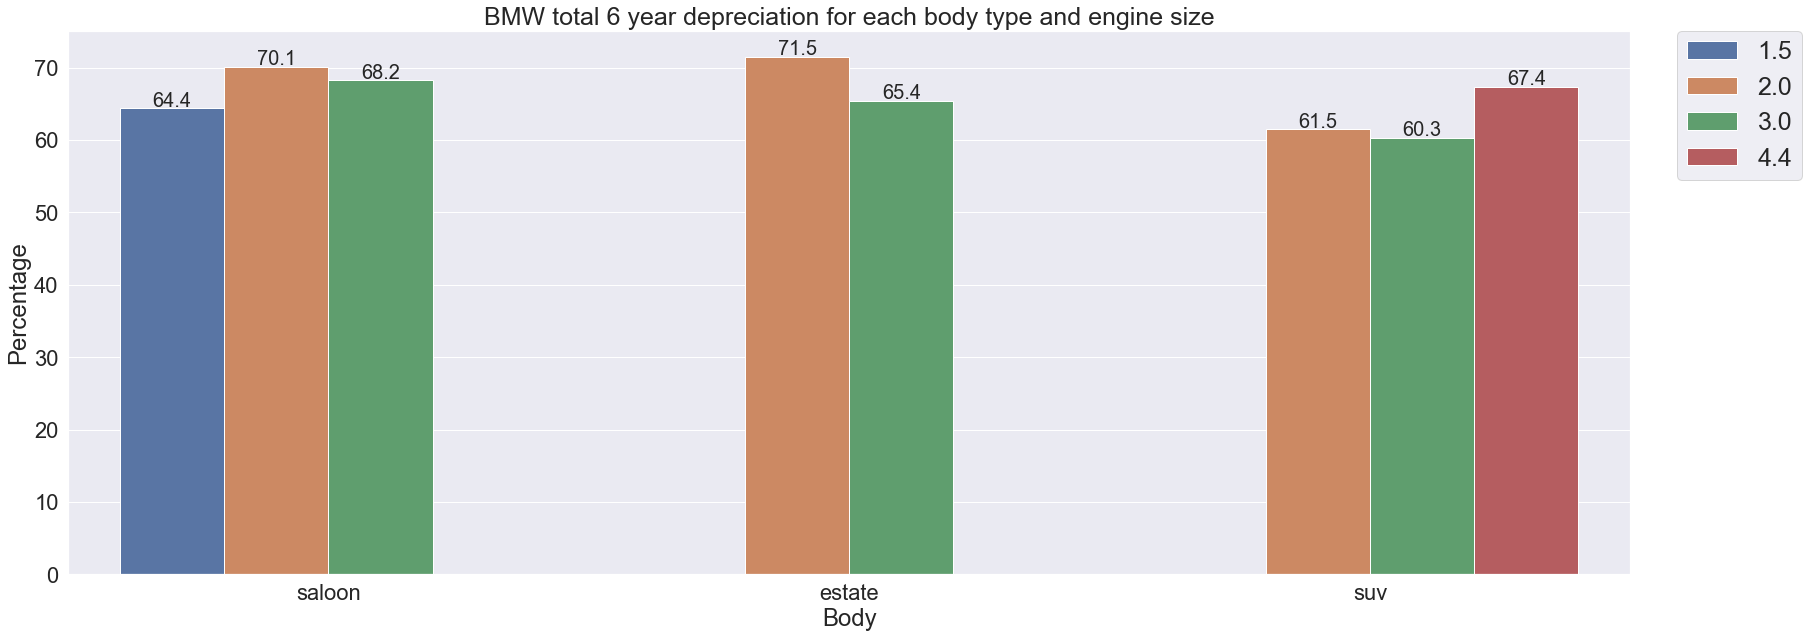

In [267]:
plotting_function('Body', 'Age depreciation', age_depreciation_all_years_and_engines,\
                  'BMW total 6 year depreciation for each body type and engine size', 'Engine size', 0)

I don't see a trend on this one. Let's try the second angle.

### **Analyse**

Next up price sensitivity caused by mileage.

In [268]:
list_of_years = np.sort(df_BMW['year'].unique())
list_of_bodies = np.delete(df_BMW['body'].unique(),np.where(df_BMW['body'].unique()=='unlisted'))
list_of_engine_sizes = np.sort(np.delete(df_BMW['engine_size'].unique(), np.where(df_BMW['engine_size'].unique() == 50)))

milage_depreciation_all_years_and_engine = pd.DataFrame(columns = ['Body', 'Engine size', 'Milage induced price difference'])

counter = 0

for body in list_of_bodies:
    for engine in list_of_engine_sizes:
        acumulator = 0
        corrector = 0
        for year in list_of_years:
            filtered_df = df_BMW.loc[(df_BMW['engine_size'] == engine) & (df_BMW['year'] == year) & (df_BMW['body'] == body)]
            low_milage_mean = filtered_df.loc[filtered_df['milage'] < filtered_df['milage'].mean()]['price'].mean()
            high_milage_mean = filtered_df.loc[filtered_df['milage'] > filtered_df['milage'].mean()]['price'].mean()
            if pd.notna(low_milage_mean) and pd.notna(high_milage_mean):
                percentage_difference = (low_milage_mean - high_milage_mean) / low_milage_mean * 100
                acumulator += percentage_difference
            else:
                corrector += 1
        if (len(list_of_years) - corrector) > 0:
            percentage_difference = acumulator / (len(list_of_years) - corrector)
            milage_depreciation_all_years_and_engine.loc[counter, 'Engine size'] = engine
            milage_depreciation_all_years_and_engine.loc[counter, 'Body'] = body
            milage_depreciation_all_years_and_engine.loc[counter, 'Milage induced price difference'] = percentage_difference
            counter += 1
        elif (len(list_of_years) - corrector) < 0:
            print('Acumulator: ', acumulator,', Corrector: ', corrector)
        else:
            pass

### **Visualise**

A picture is worth a thousand words.

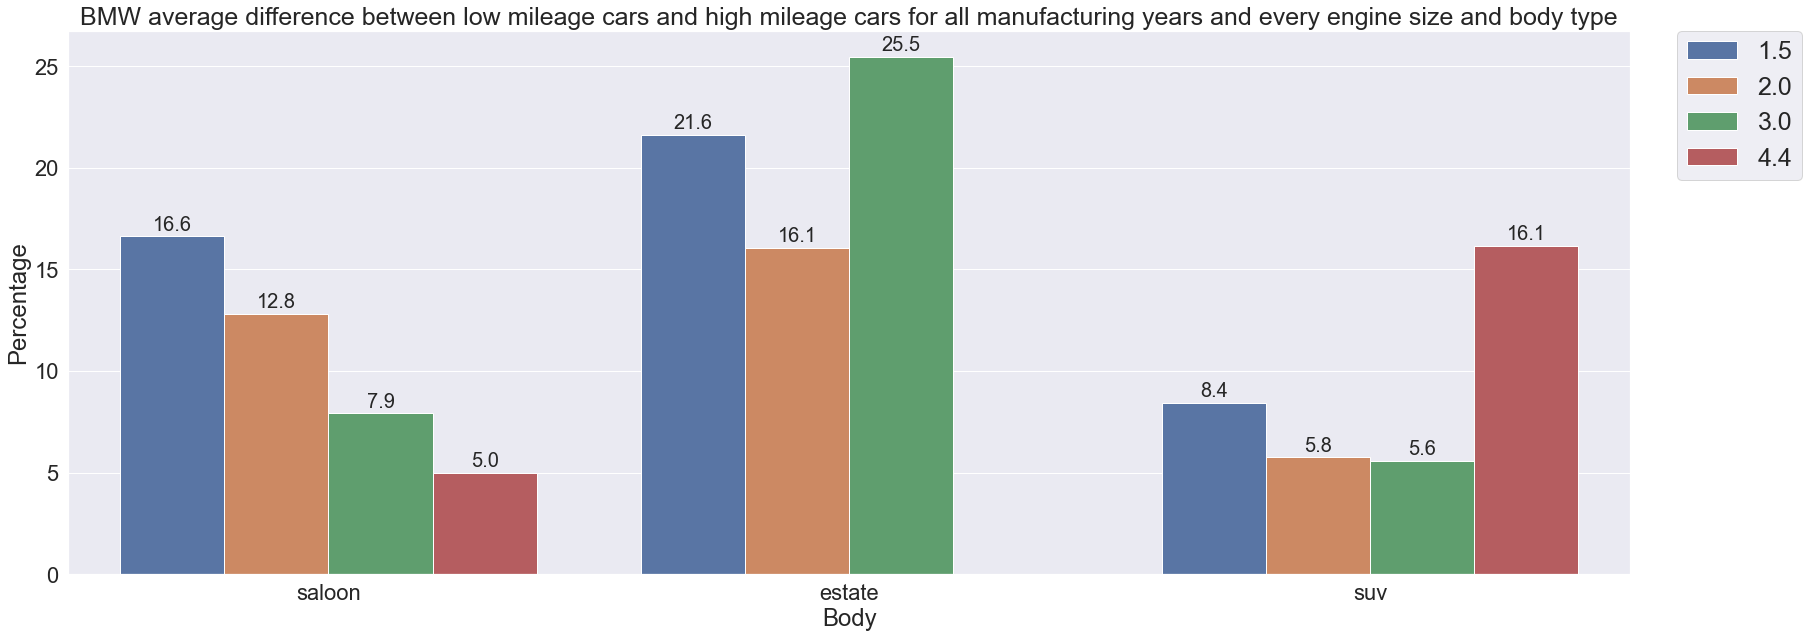

In [269]:
plotting_function('Body', 'Milage induced price difference', milage_depreciation_all_years_and_engine,\
                  'BMW average difference between low mileage cars and high mileage cars for all manufacturing years and every engine size and body type', 'Engine size', 0)

Again, I cannot see a trend even from this angle of inquiry. It seems like for this one the answer is no, but again specifically for BMW UK market.

## **Question 4: Do some brands depreciate less than others?**

### **Analyse**

From the previous experience I will elicit the help of the methods and plots used for **Question 1** and **Question 2** and use data from adds of Jaguar vehicles. We will again skip the year by year breakdown.

In [270]:
age_depreciation_all_years = total_depreciation(df_Jaguar)

### **Visualise**

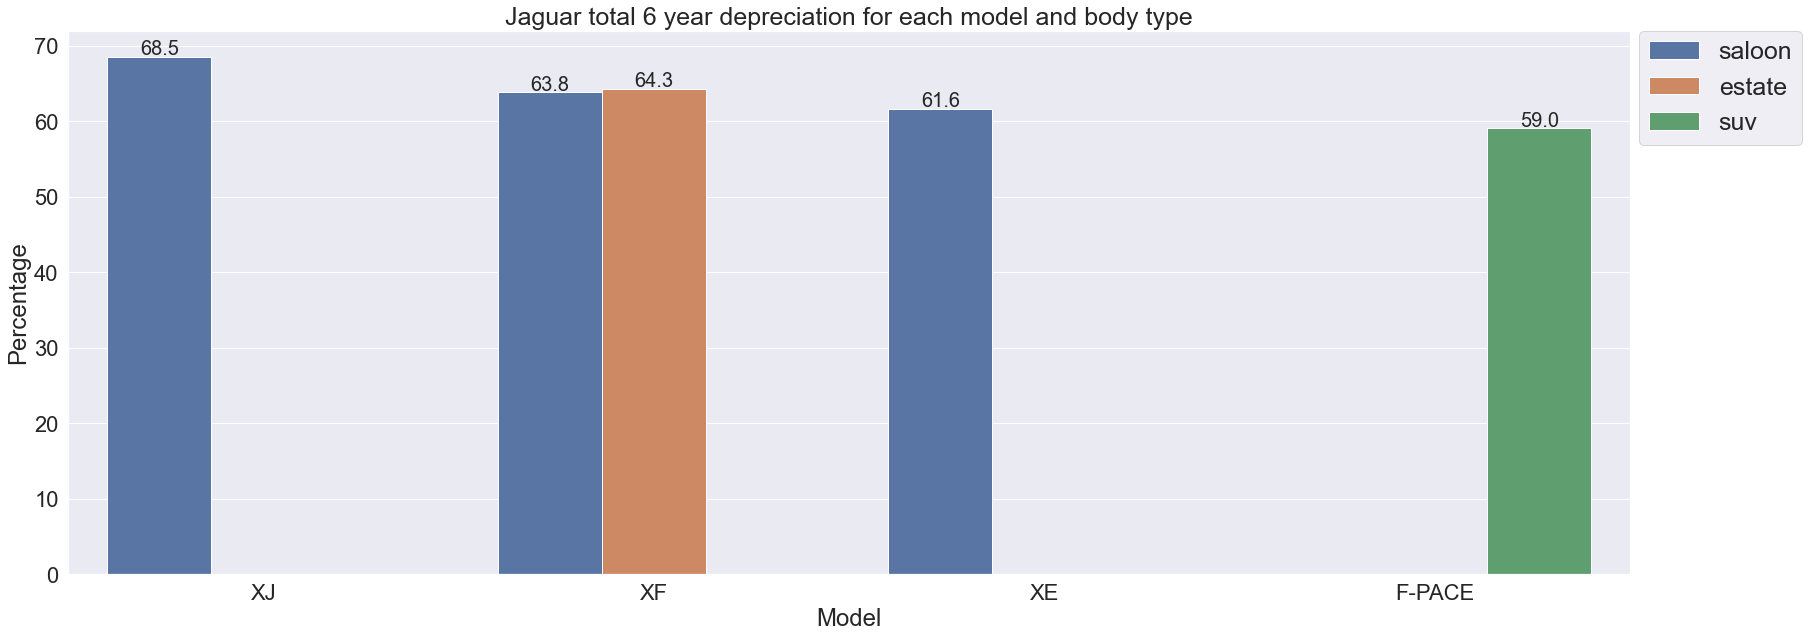

In [271]:
plotting_function('Model', 'Age depreciation', age_depreciation_all_years, 'Jaguar total 6 year depreciation for each model and body type', 'Body', 0)

We see a very similar trend to what we did with the BMW dataset. I am aware the E-Pace is missing from that chart but it has not been around for long enough to look at depreciation over 6 years.

Averaging it out for all the different models, where we can do that, we get:
1. SUVs by 59%.
2. Saloons by 64.63%.
3. Estates by 64.3%.

Summarizing it like that we can see that while there is still a trend even for the Jaguar brand the gap is smaller and overall values are slightly smaller too, **indicating that Jaguars do depreciate slightly less**.

### **Analyse**
Time to move on to the last step and look at mileage sensitivity

In [272]:
milage_depreciation_all_years = mileage_sensitivity_all_years(df_Jaguar)

### **Visualise**

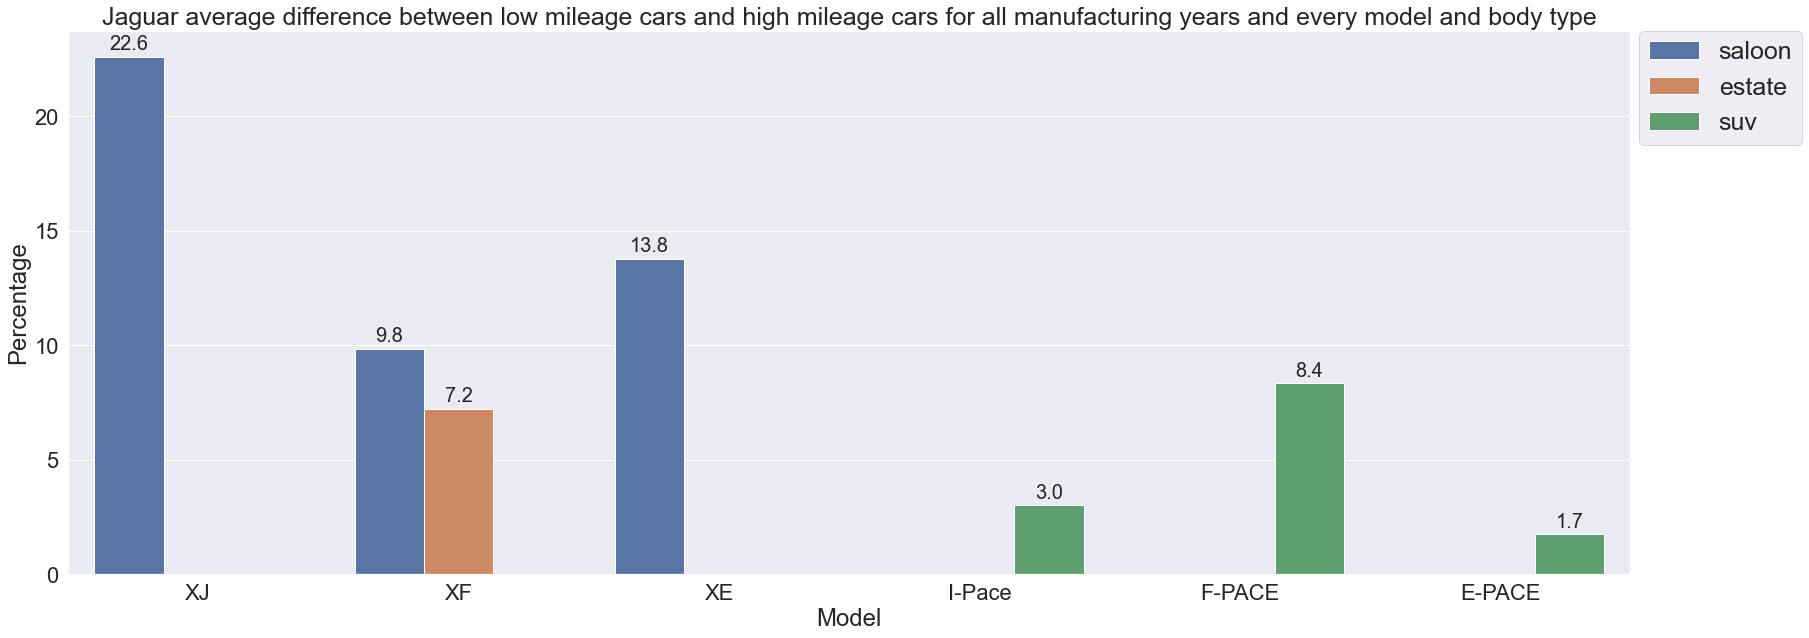

In [273]:
plotting_function('Model', 'Milage induced price difference', milage_depreciation_all_years,\
                  'Jaguar average difference between low mileage cars and high mileage cars for all manufacturing years and every model and body type', 'Body', 0)

I have left out I-Pace and E-Pace. I-Pace is an electric car so that has a new component contributing to it’s value. E-Pace has not been around for long enough to see how the mileage induced price difference will be as it gets older, i.e. while it’s in warranty people might not mind mileage difference so much.

Averaging it out for all the different models, where we can do that we get:
1. SUVs, 8.4%.
2. Saloons, 15.4%.
3. Estates, 7.2%.

Again, overall the Jaguar brend performs better in this aspect as well. Another good observation is that it is important do your research because, for the Jaguar brand, the most mileage sensitive body type is not the estate but the saloon. So the answer to question 4 is again a yes, but you would need to do the research as the current conclusion is specific to the data that we've looked at here.